In [57]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('gender_submission.csv')


In [4]:
train.head(10)
#tampilin 10 teratas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train.tail(10)
#10 terbawah

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [6]:
#data statistik berguna
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.info()
#info data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train = train.drop(['PassengerId', 'Cabin'], axis = 1)
#buang kolom yang kurang berguna, [isi yang mau dibuang] pssid = angka urut biasa, cabin = banyak ga tau, axis = 1 (column), 0 (row)

In [9]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [6]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [56]:
train.loc[train['Survived']==1].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [7]:
train.loc[train['Survived']==0].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S


In [9]:
#ganti ke numerical python biasa
def gen(Gen):
    if Gen == 'female':
        return 1
    elif Gen == 'male':
        return 0

In [10]:
train['Sex'] = train['Sex'].apply(gen)

In [15]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


MINGGU 2

In [11]:
train = pd.get_dummies(train, columns=['Embarked'])

In [17]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1


In [12]:
train['title'] = [i.split('.')[0] for i in train.Name.astype('str')]
train['title'] = [i.split(',')[1] for i in train.title.astype('str')]
train['title'] = [i.split('.')[0] for i in train.Name.astype('str')]
train['title'] = [i.split(',')[1] for i in train.title.astype('str')]

In [19]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1,Mrs
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,Mr


In [20]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1,Mrs
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,Mr


- one hot encoding 001 010 100
- label encoding - 0 1 2 3 

In [13]:
train = train.drop(['Name'], axis = 1)

In [22]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,title
0,0,3,0,22.0,1,0,A/5 21171,7.2500,0,0,1,Mr
1,1,1,1,38.0,1,0,PC 17599,71.2833,1,0,0,Mrs
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,Miss
3,1,1,1,35.0,1,0,113803,53.1000,0,0,1,Mrs
4,0,3,0,35.0,0,0,373450,8.0500,0,0,1,Mr


In [15]:
train = train.drop(['Cabin'], axis = 1)

KeyError: "['Cabin'] not found in axis"

In [16]:
train = train.drop(['train'], axis = 1)

KeyError: "['train'] not found in axis"

In [17]:
train = train.drop(['Ticket'], axis = 1)

In [47]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,title
0,0,3,0,22.0,1,0,7.2500,0,0,1,7
1,1,1,1,38.0,1,0,71.2833,1,0,0,1
2,1,3,1,26.0,0,0,7.9250,0,0,1,2
3,1,1,1,35.0,1,0,53.1000,0,0,1,1
4,0,3,0,35.0,0,0,8.0500,0,0,1,7


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
title         891 non-null int64
dtypes: float64(2), int64(6), uint8(3)
memory usage: 58.4 KB


In [18]:
train[['title','Survived']].groupby(['title'],
                                    as_index=False).mean().sort_values(by='Survived', ascending=False)

,title,Survived
16,the Countess,1.000000
9,Mlle,1.000000
15,Sir,1.000000
13,Ms,1.000000
5,Lady,1.000000
10,Mme,1.000000
12,Mrs,0.792000
8,Miss,0.697802
7,Master,0.575000
1,Col,0.500000


In [28]:
train[['title','Survived']].groupby(['title'], as_index=False).describe()

Survived                                               
      count      mean       std  min   25%  50%   75%  max
0       1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
1       2.0  0.500000  0.707107  0.0  0.25  0.5  0.75  1.0
2       1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
3       7.0  0.428571  0.534522  0.0  0.00  0.0  1.00  1.0
4       1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
5       1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0
6       2.0  0.500000  0.707107  0.0  0.25  0.5  0.75  1.0
7      40.0  0.575000  0.500641  0.0  0.00  1.0  1.00  1.0
8     182.0  0.697802  0.460477  0.0  0.00  1.0  1.00  1.0
9       2.0  1.000000  0.000000  1.0  1.00  1.0  1.00  1.0
10      1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0
11    517.0  0.156673  0.363844  0.0  0.00  0.0  0.00  1.0
12    125.0  0.792000  0.407510  0.0  1.00  1.0  1.00  1.0
13      1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0
14      6.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
15      1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0
16      1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0

In [19]:
train[['title','Survived']].groupby(['title'],
                                    as_index=False).count().sort_values(by='Survived', ascending=False)

,title,Survived
11,Mr,517
8,Miss,182
12,Mrs,125
7,Master,40
3,Dr,7
14,Rev,6
6,Major,2
1,Col,2
9,Mlle,2
15,Sir,1


In [20]:
def Title(t):
    if t == ' the Countess' or t == ' Mlle' or t == ' Sir' or t == ' Ms' or t == ' Lady' or t == ' Mme':
        return 0
    elif t == ' Mrs':
        return 1
    elif t == ' Miss':
        return 2
    elif t == ' Master':
        return 3
    elif t == ' Col':
        return 4
    elif t == ' Major':
        return 5
    elif t == ' Dr':
        return 6
    elif t == ' Mr':
        return 7
    else:
        return 8

In [21]:
train['title'] = train['title'].apply(Title)

In [49]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,title
0,0,3,0,22.0,1,0,7.2500,0,0,1,7
1,1,1,1,38.0,1,0,71.2833,1,0,0,1
2,1,3,1,26.0,0,0,7.9250,0,0,1,2
3,1,1,1,35.0,1,0,53.1000,0,0,1,1
4,0,3,0,35.0,0,0,8.0500,0,0,1,7


In [22]:
pd.crosstab(train['title'],train['Survived'])

Survived,0,1
title,,
0,0,7
1,26,99
2,55,127
3,17,23
4,1,1
5,1,1
6,4,3
7,436,81
8,9,0


In [25]:
def isUmur(u):
    if u == 0:
        return train.loc[train['title']==0].Age.mean()
    elif u == 1:
        return train.loc[train['title']==1].Age.mean()
    elif u == 2:
        return train.loc[train['title']==2].Age.mean()
    elif u == 3:
        return train.loc[train['title']==3].Age.mean()
    elif u == 4:
        return train.loc[train['title']==4].Age.mean()
    elif u == 5:
        return train.loc[train['title']==5].Age.mean()
    elif u == 6:
        return train.loc[train['title']==6].Age.mean()
    elif u == 7:
        return train.loc[train['title']==7].Age.mean()
    elif u == 8:
        return train.loc[train['title']==8].Age.mean()

fillna = APPLY YANG KOSONG-KOSONG, ISI YANG Na DENGAN RERATA UMUR KELOMPOK DATA

In [26]:
train['Age'] = train['Age'].fillna(train.title.apply(isUmur))

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
title         891 non-null int64
dtypes: float64(2), int64(6), uint8(3)
memory usage: 58.4 KB


In [27]:
x_train = train[:600]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'], axis = 1), train['Survived'], test_size = 0.2)

In [29]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 10) (179, 10) (712,) (179,)


In [30]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Prediksi = logreg.predict(X_test)
akurasi_tain = round(logreg.score(X_train, y_train)*100,2)
akurasi_validasi = round(logreg.score(X_test, y_test)*100,2)

print(akurasi_tain)
print(akurasi_validasi)

82.87
80.45


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,title
0,0,3,0,22.0,1,0,7.2500,0,0,1,7
1,1,1,1,38.0,1,0,71.2833,1,0,0,1
2,1,3,1,26.0,0,0,7.9250,0,0,1,2
3,1,1,1,35.0,1,0,53.1000,0,0,1,1
4,0,3,0,35.0,0,0,8.0500,0,0,1,7


In [32]:
Prediksi

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0])

In [33]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
test = test.drop(['PassengerId','Ticket','Cabin'], axis = 1)

In [35]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [36]:
test = pd.get_dummies(test, columns=['Embarked'])

In [37]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,0,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,0,0,1
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,0,1,0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,0,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,0,0,1


In [38]:
test['Sex'] = test['Sex'].apply(gen)

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass        418 non-null int64
Name          418 non-null object
Sex           418 non-null int64
Age           332 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          417 non-null float64
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(2), int64(4), object(1), uint8(3)
memory usage: 24.2+ KB


In [40]:
test['title'] = [i.split('.')[0] for i in test.Name.astype('str')]
test['title'] = [i.split(',')[1] for i in test.title.astype('str')]

In [41]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,title
0,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,0,1,0,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,0,0,1,Mrs
2,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,0,1,0,Mr
3,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,0,0,1,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,0,0,1,Mrs


In [42]:
test['title'] = test['title'].apply(Title)

In [43]:
def isUmur(u):
    if u == 0:
        return test.loc[test['title']==0].Age.mean()
    elif u == 1:
        return test.loc[test['title']==1].Age.mean()
    elif u == 2:
        return test.loc[test['title']==2].Age.mean()
    elif u == 3:
        return test.loc[test['title']==3].Age.mean()
    elif u == 4:
        return test.loc[test['title']==4].Age.mean()
    elif u == 5:
        return test.loc[test['title']==5].Age.mean()
    elif u == 6:
        return test.loc[test['title']==6].Age.mean()
    elif u == 7:
        return test.loc[test['title']==7].Age.mean()
    elif u == 8:
        return test.loc[test['title']==8].Age.mean()

In [44]:
test['Age'] = test['Age'].fillna(test.title.apply(isUmur))

In [45]:
test['Age'] = test.Age.fillna(test.Age.mean())

In [46]:
test = test.drop(['Name'], axis = 1)

In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          417 non-null float64
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
title         418 non-null int64
dtypes: float64(2), int64(5), uint8(3)
memory usage: 24.2 KB


In [48]:
test.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,title
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,30.211045,0.447368,0.392344,35.627188,0.244019,0.110048,0.645933,4.806220
std,0.841838,0.481622,13.010059,0.896760,0.981429,55.907576,0.430019,0.313324,0.478803,2.654034
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,2.000000
50%,3.000000,0.000000,30.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,7.000000
75%,3.000000,1.000000,36.875000,1.000000,0.000000,31.500000,0.000000,0.000000,1.000000,7.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,8.000000


In [49]:
test['Fare'] = test.Fare.fillna(test.Fare.median())

In [50]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,title
0,3,0,34.5,0,0,7.8292,0,1,0,7
1,3,1,47.0,1,0,7.0000,0,0,1,1
2,2,0,62.0,0,0,9.6875,0,1,0,7
3,3,0,27.0,0,0,8.6625,0,0,1,7
4,3,1,22.0,1,1,12.2875,0,0,1,1


In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
title         418 non-null int64
dtypes: float64(2), int64(5), uint8(3)
memory usage: 24.2 KB


In [53]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression()
X = train.drop(['Survived'], axis = 1)
y = train['Survived']

accuracy = cross_val_score(logreg, X, y, scoring='accuracy', cv = 10)

logreg.fit(X,y)
print(accuracy)
#get the mean of each fold
print("Rata-rata akurasi:",accuracy.mean() * 100)

[0.83333333 0.83333333 0.78651685 0.85393258 0.82022472 0.76404494
 0.80898876 0.79775281 0.85393258 0.85227273]
Rata-rata akurasi: 82.04332652366361


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [54]:
logreg.fit(X,y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
y_submit = logreg.predict(test)

In [56]:
y_submit

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [58]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [59]:
submission['Survived'] = y_submit
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [60]:
submission.to_csv('titanic_submit.csv', index=False)

In [61]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


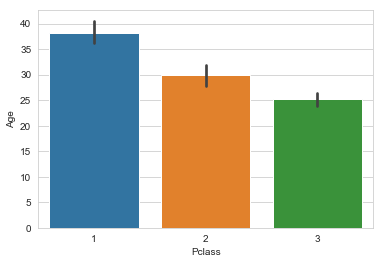

In [62]:
sns.set_style('whitegrid')
classAge = sns.barplot(x = 'Pclass', y = 'Age', data = train)

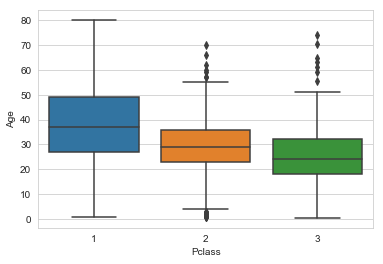

In [63]:
classAge = sns.boxplot(x = 'Pclass', y = 'Age', data = train)

titik-titik = outliers

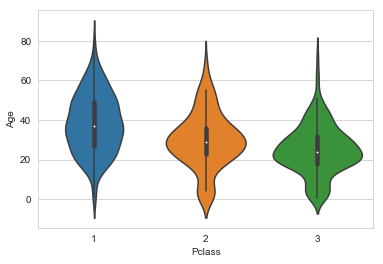

In [64]:
classAge = sns.violinplot(x = 'Pclass', y = 'Age', data = train)

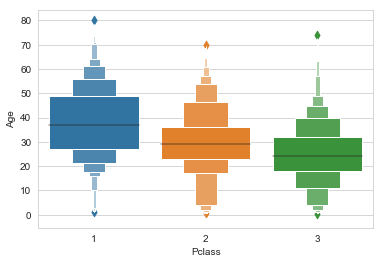

In [65]:
classAge = sns.boxenplot(x = 'Pclass', y = 'Age', data = train)

bedanya violin sm boxen, di violin gaditampilin outliers

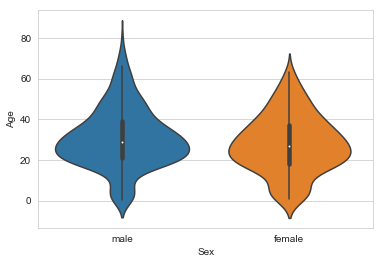

In [66]:
classAge = sns.violinplot(x = 'Sex', y = 'Age', data = train)

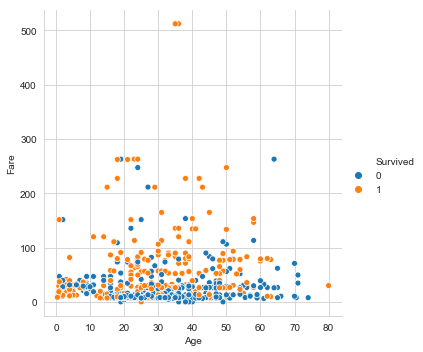

In [71]:
sns.relplot(x = 'Age', y = 'Fare', hue = 'Survived', data = train)

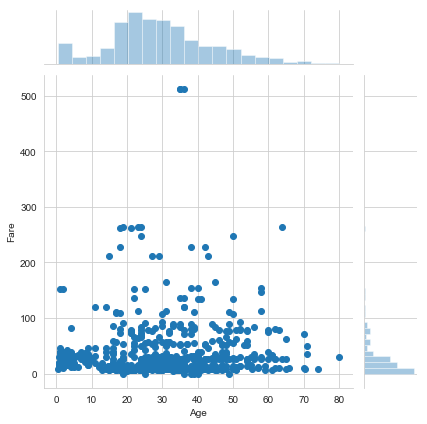

In [73]:
sns.jointplot(x = 'Age', y = 'Fare', data = train)

In [79]:
sns.heatmap(data=train, vmin = 0, vmax = 1)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [80]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
